In [6]:
import torch
from torch import nn
from __init__ import init
init()
from utils.util import *
from model.train import *

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [4]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

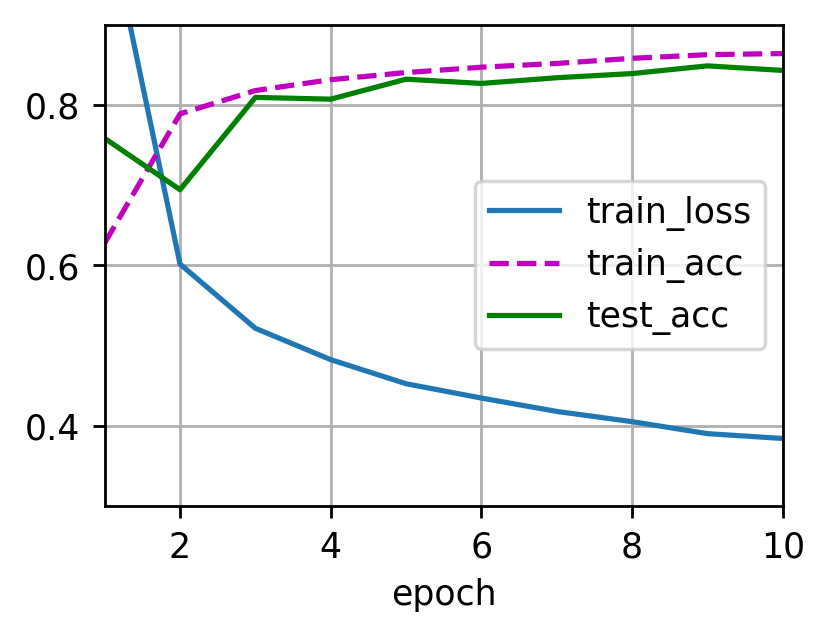

In [7]:
num_epochs, lr = 10, 0.1
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr)

train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)